In [15]:
import json
import pickle
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#Open the info file
def load(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break



In [16]:
def get_epochs_per_k(output_file):
    items = load(output_file)
    epochs_per_k = {}
    max_k=100

    for k in range(1,max_k):
        #print k
        _epochs = []
        items = load(output_file)
        for item in items:
            #print item
            markovity = item['markovity']
            #print k,markovity
            if markovity==k:
                #print k
                _epochs.append(item['epoch_stopped'])

        if len(_epochs):
            _array = np.asarray(_epochs)
            #print _array
            epochs_per_k[k] = np.mean(_array)
    return epochs_per_k

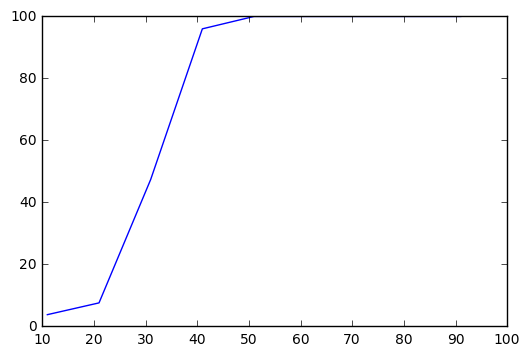

In [24]:
# Plotting
#print epochs_per_k
output_file = "output_0entropy_3.txt"
epochs_per_k = get_epochs_per_k(output_file)
epoch_stopped = sorted(epochs_per_k.items())
x1, y1 = zip(*epoch_stopped)
plt.plot(x1, y1)
plt.show()


## Experiment with 0 Entropy sources

Sources such as:
$$ X_n = X_{n-1} + X_{n-k}$$
The X-axis is the $k$ markovity, and Y-axis the number of epochs for convergence.

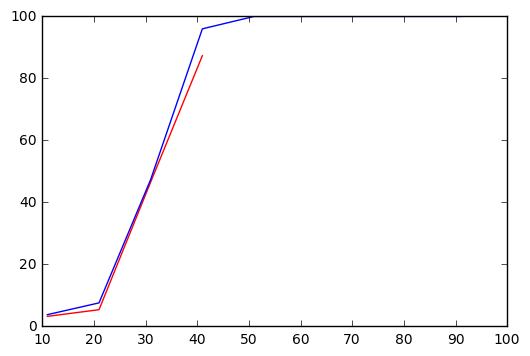

In [35]:
# Plotting
#print epochs_per_k
output_file = "output_0entropy_4.txt"
epochs_per_k = get_epochs_per_k(output_file)
epoch_stopped = sorted(epochs_per_k.items())
x, y = zip(*epoch_stopped)
plt.plot(x, y,'r')
plt.plot(x1,y1,'b')
plt.show()
